# Support Vector Regression

* Like the Knn  model, Support Vector Regression model first appeared for classification problems. It was later used for regression problems.



* The purpose of this model is to determine the line or curve to get the maximum point in a margin range with the smallest error. 



* The Support Vector Regression(SVR) model is resistant to outliers in the data set.



* The SVR function is created by keeping the distances of the outliers from the limits of the previously determined margin range constant.



* In the SVR model, outliers are the values outside the margin boundaries.

_In this section, **linear** and **nonlinear** SVR  will be discussed._

# 1-) Linear SVR model

## 1.1) Data Preprocessing

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

* First, we will SVR with two variables (1 independent variable and 1 dependent variable) and compare with simple linear regression. We dont use all indpendent variables


* We chose 
       
      *"Hits "===== >>> independent variable
      
      *"Salary" ==== >>>> dependent variable

In [3]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

## 1.2) Model

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
from sklearn.svm import SVR

In [6]:
svr_model = SVR("linear").fit(X_train, y_train) #  kernel of SVR is linear

In [9]:
svr_model.intercept_[0]

-48.69756097561513

In [11]:
svr_model.coef_[0][0]

4.969512195122093

### 1.2.1) The equation of linear SVR model

In [12]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


##  1.3) Prediction for Train set

In [14]:
y_pred = svr_model.predict(X_train)
y_pred[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [16]:
import matplotlib.pyplot as plt

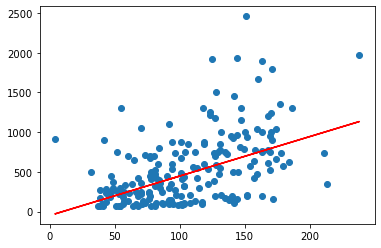

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r");

## 1.4) Simple Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)

In [20]:
lm_model.intercept_

-8.814095480334572

In [22]:
 lm_model.coef_[0]

5.1724561354706875

### 1.4.1) The equation of Simple Linear Regression Model

In [23]:
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


## 1.5) The comparison of Simple Linear Regression Model and Linear SVM model

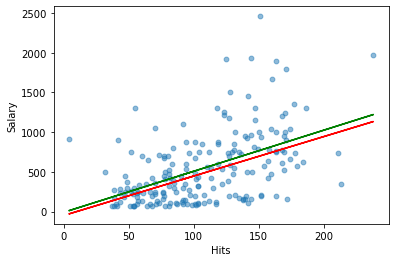

In [24]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Hits")
plt.ylabel("Salary");

* **Green line** ==>> Simple Linear Regression Model


* **Red line** ===>> SVR Linear Model


* SVR Linear model will make more optimal or accurate predictions because it is more resistant to outlier observations.

##  1-6) Prediction for Test Set 

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
y_pred1 = svr_model.predict(X_test)

In [30]:
test_error_before=np.sqrt(mean_squared_error(y_test, y_pred1))
test_error_before   #test error before model tuning

459.0187960365147

In [31]:
svr_model

SVR(kernel='linear')

## 1-7)Model Tuning

* In this section, we will try to determine the optimum **Value of Complexity Parameter** (C) with the GridSearchCV method.


* **C** stands for Value of Complexity Parameter


* GridSearchCV: Grid Search Cross Validation Methode



* Then , we will create the mos optimum model by using Value of Complexity Parameters .



In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
svr_model1 = SVR("linear")

In [44]:
svr_model1.C #Value of Complexity Parameter of Non-tuned model

1.0

* **C** is the hyperparameter that we will determine according to ourselves and we want it to be the most optimum.


* But instead of relying on our own feeling and sense in order to find the optimum **C** , we will find the optimum **C** value by using the gridsearch method.

In [45]:
parameters=np.arange(0.1,2,0.1)
parameters

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [46]:
svr_params = {"C": parameters}

In [68]:
type(svr_params)

dict

* Type of _svr_params_ always should be _**dictionary**_ in order to use in GridSearchCV. Otherwise the code will give an erroR  

In [47]:
svr_cv_model = GridSearchCV(svr_model1, svr_params, cv = 10)

In [48]:
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='linear'),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])})

In [49]:
svr_cv_model.best_params_

{'C': 0.1}

### 4.1)Tuned model

In [50]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [51]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [52]:
y_pred2 = svr_tuned.predict(X_test)

In [53]:
test_error_after=np.sqrt(mean_squared_error(y_test, y_pred2))

test_error_after# test error after model tuning

458.198966781116

# 2-) Non-Linear SVR model

* we will use all 19 independent variables in order to creata our non-linar model

## 2.1) Data Preprocessing

In [60]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

In [61]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [62]:
svr_rbf = SVR("rbf").fit(X_train, y_train)# we chose the kernel of the SVR as "rbf" in order to get a non-linear model.

## 2-2)Prediction

In [63]:
y_pred3 = svr_rbf.predict(X_test)

In [64]:
test_error_before=np.sqrt(mean_squared_error(y_test, y_pred3))
test_error_before # test error before model tuning

460.0032657244849

## 2-3) Model tuning

In [65]:
svr_params1 = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}

In [66]:
svr_cv_model = GridSearchCV(svr_rbf,svr_params1, cv = 10)

In [67]:
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [69]:
svr_cv_model.best_params_

{'C': 50}

In [70]:
pd.Series(svr_cv_model.best_params_)[0]# the optimum value of C

50

In [71]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)

In [72]:
y_pred4 = svr_tuned.predict(X_test)

In [73]:
test_error_after=np.sqrt(mean_squared_error(y_test, y_pred4))
test_error_after # test error before model tuning

428.00406888095694